In [0]:
Regression has a scaler continuous value. Using normalization x-mean/deviation. No activation function is used in the last layer of regression model. Mean square error is used as loss function in regression. 

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [16]:
print(train_data.shape)

(404, 13)


In [7]:
print(test_data.shape)

(102, 13)


In [10]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [13]:
train_targets[0]

15.2

In [0]:
Preparing the data

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Building the network

In [17]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

In [28]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history=model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Errors

In [29]:
 print("all fold validation errors",all_scores)

all fold validation errors [2.308567523956299, 3.038454055786133, 2.654994010925293, 3.0297296047210693]


In [30]:
 print("mean of all fold validation errors",np.mean(all_scores))

mean of all fold validation errors 2.7579362988471985


In [31]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print("average mae Mae history", average_mae_history)

average mae Mae history [10.840521335601807, 3.651333272457123, 3.0240127444267273, 2.7440998554229736, 2.583215594291687, 2.4443135261535645, 2.383009672164917, 2.3586835265159607, 2.2753774523735046, 2.2348305583000183, 2.1982412934303284, 2.1804869771003723, 2.1068694591522217, 2.1299928426742554, 2.099458694458008, 2.064920127391815, 2.05684295296669, 2.033280223608017, 2.022768020629883, 1.97808176279068, 1.9907236695289612, 1.9493027925491333, 1.952101856470108, 1.9238226413726807, 1.8950686156749725, 1.9232847094535828, 1.8882246017456055, 1.8740638494491577, 1.8844464421272278, 1.8378663063049316, 1.8200966715812683, 1.806275486946106, 1.8013258278369904, 1.8040919601917267, 1.8240060806274414, 1.7871329188346863, 1.7469244301319122, 1.7565466165542603, 1.7429524660110474, 1.7297815382480621, 1.7289729416370392, 1.6941013634204865, 1.710580974817276, 1.6767549216747284, 1.6685090959072113, 1.673734575510025, 1.6398487389087677, 1.6555496156215668, 1.6727044582366943, 1.63307753

In [32]:
[len(x) for x in all_mae_histories]

[500, 500, 500, 500]

Plotting Error

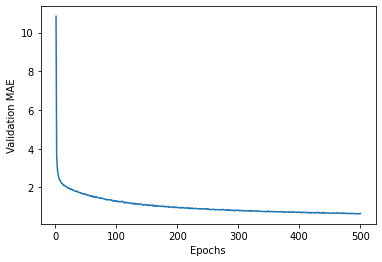

In [33]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 61


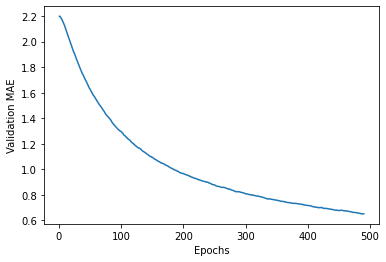

In [34]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training final model

In [35]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 38.6686 - mae: 2.5263


In [36]:
test_mae_score

2.5263140201568604